#**Q3**

In [ ]:
import numpy as np

# Compute the projection of y onto the subspace
def projection(y, W):
    y_proj = np.zeros(y.shape)
    for w in W:
        y_proj += np.dot(y, w) / np.dot(w, w) * w
    return y_proj

# Compute the unit vector orthogonal to the hyperplane
def orthogonal_unit_vector(y, W):
    y_proj = projection(y, W)
    w = y - y_proj
    return w / np.linalg.norm(w)


y = np.array([0.1, 0.4, 0.8])
W = [np.array([0.1, 0.1, 0.2]), np.array([0.5, 0.6, 0.4])]

y_proj = projection(y, W)

w = orthogonal_unit_vector(y, W)

print("Projection of y onto the subspace:", y_proj)
print("Unit vector orthogonal to the hyperplane:", w)


Projection of y onto the subspace: [0.7461039  0.82532468 1.01688312]
Unit vector orthogonal to the hyperplane: [-0.80425057 -0.52943128 -0.26996954]


#**Q8**

(a) Create a data matrix X of size 200 × 784 by choosing the first 50 rows of train0, train1, train2, and train3 and append them together. Note that the matrix train0 contains images for digit 0, train1 contains images for digit 1, and so on. Each column in the matrix represents one of the 784 pixels (28 × 28) of the corresponding images.

In [ ]:
import numpy as np
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Filter the training images for digits 0, 1, 2, and 3
train0 = x_train[y_train == 0][:50]
train1 = x_train[y_train == 1][:50]
train2 = x_train[y_train == 2][:50]
train3 = x_train[y_train == 3][:50]

# Concatenate the filtered training images
X = np.concatenate((train0, train1, train2, train3))
print(X.shape)
# Flatten the images into a 784-dimensional vector
X = X.reshape(200, 784)
print(X.shape)

(200, 28, 28)
(200, 784)


In [ ]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

(b) Plot the resulting images 

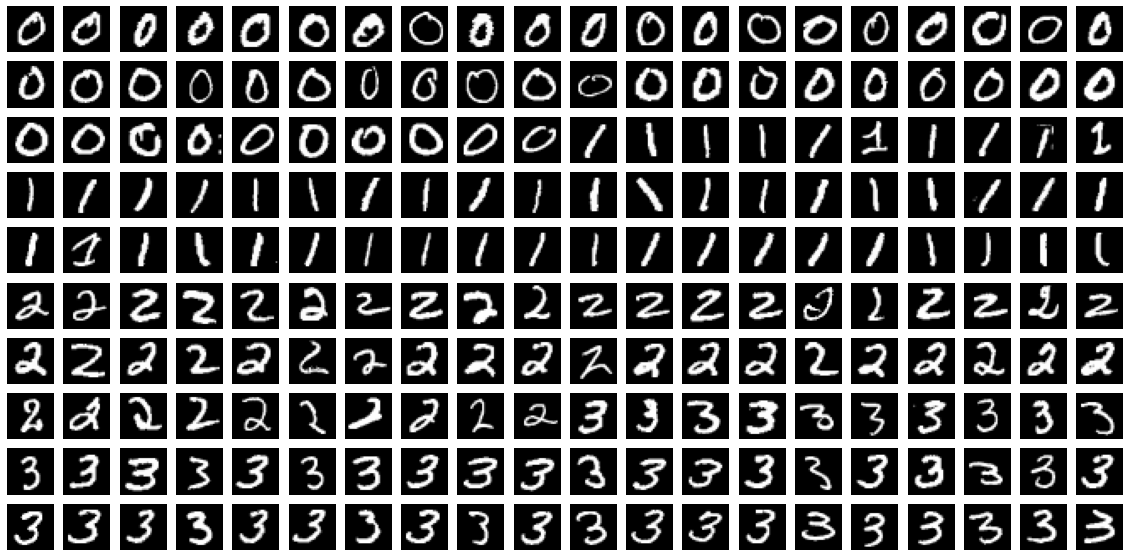

In [ ]:
# Plot the concatenated images
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
for i in range(200):
    plt.subplot(10, 20, i+1)
    plt.imshow(X[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.show()

(c) Use the pca command to generate the principal components of the
matrix X

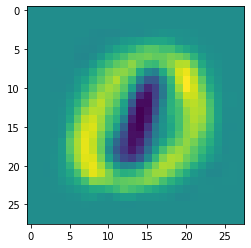

In [ ]:
def plot_pca_component(pca, comp):
    if comp <= len(pca.components_):
        mat_data = np.asmatrix(pca.components_[comp]).reshape(28,28)
        plt.imshow(mat_data)
        #plt.xticks([]) 
        #plt.yticks([])  
plot_pca_component(pca, 0)

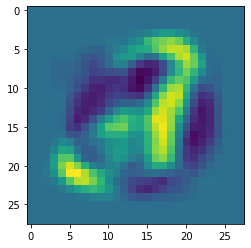

In [ ]:
plot_pca_component(pca, 1)

(d) Reduce the dimensionality from 784 to 2

(200, 28, 28)
(200,)
(200, 784)
(200,)
(200, 2)


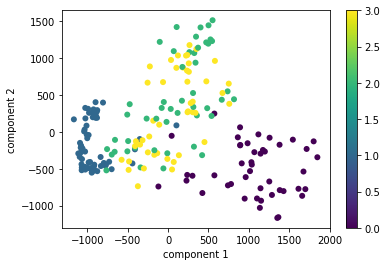

In [ ]:
import numpy as np
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

train_filter = np.where((y_train == 0) | (y_train == 1) | (y_train == 2) | (y_train == 3))
X_train, Y_train = x_train[train_filter], y_train[train_filter]

train_mask = np.isin(Y_train, [0,1,2,3])
'''
print(X_train)
print(Y_train)
print(type(X_train))
print(type(Y_train))
'''
X_train = list(X_train)
X_train = X_train[:200]

Y_train = list(Y_train)
Y_train = Y_train[:200]

X_train = np.asarray(X_train)
Y_train = np.asarray(Y_train)

print(X_train.shape)
print(Y_train.shape)
#print(train_mask)
X_train = X_train.reshape(200, 784)
pca = PCA(2)  
projected = pca.fit_transform(X_train)
print(X_train.shape)
print(Y_train.shape)
print(projected.shape) #compare and see the reduced dimensionality
plt.scatter(projected[:, 0], projected[:, 1], c=Y_train, edgecolor='none', cmap='viridis')
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

(e) Plot the resulting digit images when data is reduced to matrix of rank 2

In [ ]:
import numpy as np

print("Rank of the reduced matrix:", np.linalg.matrix_rank(X_train))
# Compute the SVD of the matrix
U, s, V = np.linalg.svd(X_train)

# Reduce the rank of the matrix by keeping only the first two singular values
X_red = U[:, :2] @ np.diag(s[:2]) @ V[:2, :]

# The resulting matrix has a rank of 2
print("Rank of the reduced matrix:", np.linalg.matrix_rank(X_red))


Rank of the reduced matrix: 200
Rank of the reduced matrix: 2


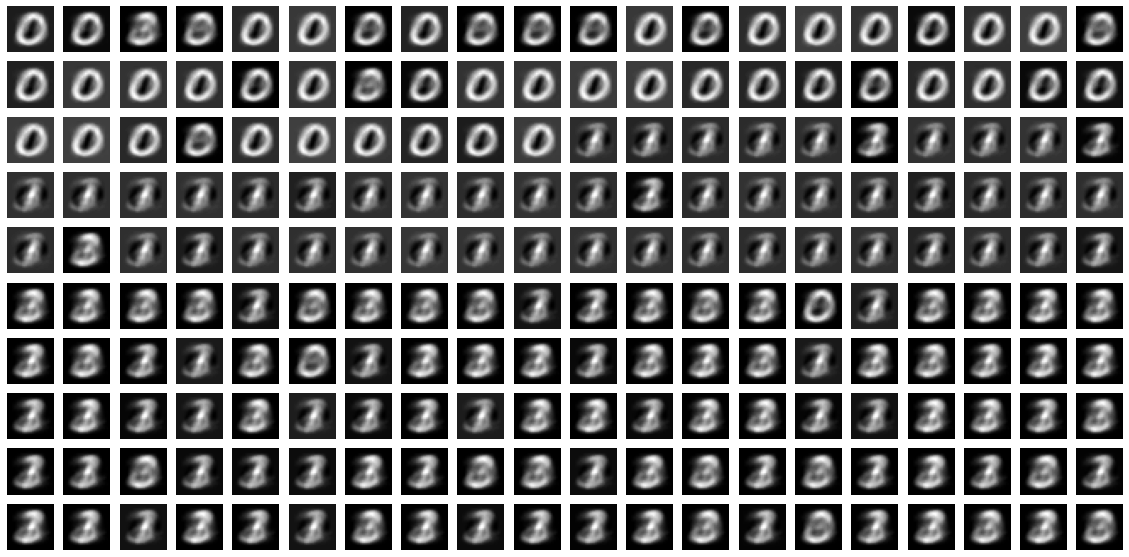

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
for i in range(200):
    plt.subplot(10, 20, i+1)
    plt.imshow(X_red[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.show()

(f) Plot the resulting digit images when data is reduced to matrix of rank 50

In [ ]:
import numpy as np

print("Rank of the reduced matrix:", np.linalg.matrix_rank(X_train))
# Compute the SVD of the matrix
U, s, V = np.linalg.svd(X_train)

# Reduce the rank of the matrix by keeping only the first two singular values
X_red50 = U[:, :50] @ np.diag(s[:50]) @ V[:50, ]

# The resulting matrix has a rank of 50
print("Rank of the reduced matrix:", np.linalg.matrix_rank(X_red50))

Rank of the reduced matrix: 200
Rank of the reduced matrix: 50


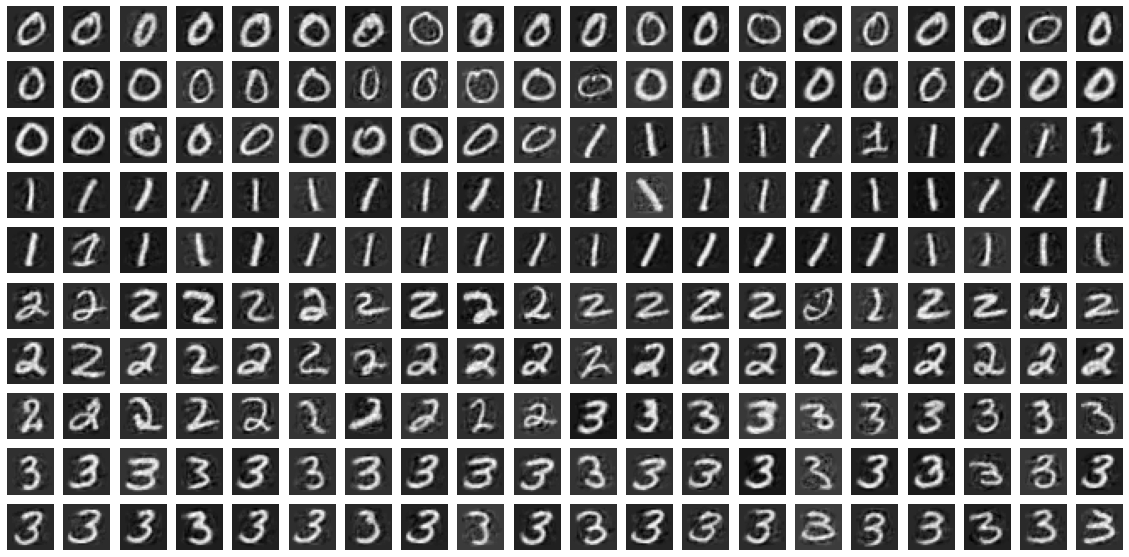

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
for i in range(200):
    plt.subplot(10, 20, i+1)
    plt.imshow(X_red50[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.show()

#**Q9**

In [ ]:
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh
import numpy as np 
def rbf_kernel_pca(X_train, gamma, n_components):
    sq = pdist(X_train, 'sqeuclidean')   
    K = exp(-gamma * squareform(sq)) 
    n = K.shape[0]
    one_mat = np.ones((n,n)) / n
    K = K - one_mat.dot(K) - K.dot(one_mat) + one_mat.dot(K).dot(one_mat) 
    eigvals, eigvecs = eigh(K)
    eigvals, eigvecs = eigvals[::-1], eigvecs[:, ::-1]   
    pc = np.column_stack([eigvecs[:, i]for i in range(n_components)])    
    return pc

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[0 1 2 1 3 1 3 3 1 2 0 1 1 2 3 2 3 0 0 1 3 3 3 0 0 1 0 1 0 0 1 1 3 0 2 1 1
 0 2 3 0 0 3 1 1 1 1 3 0 2 3 1 1 0 2 0 0 2 0 2 1 1 3 1 3 3 2 3 1 0 3 2 2 0
 2 1 1 2 3 2 3 1 2 2 2 0 3 2 1 1 3 1 0 3 1 0 0 1 2 3 0 2 1 3 0 1 0 2 0 3 3
 0 1 0 3 1 2 2 3 3 0 2 2 1 1 1 2 3 3 0 1 3 0 0 3 0 2 1 1 1 2 2 0 3 2 0 3 3
 2 3 1 2 1 1 3 1 1 0 2 3 2 1 2 2 2 1 2 2 2 3 1 1 1 0 2 3 1 1 2 1 3 0 0 2 3
 0 0 1 2 1 2 1 0 3 0 1 1 2 0 3]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(200, 784)
(200, 784)
(200,)
(200, 784)
(200,)
(200, 5)


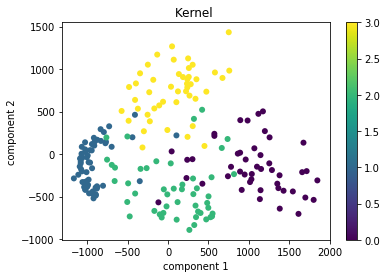

In [ ]:
import numpy as np
from numpy import reshape
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

train_filter = np.where((y_train == 0 ) | (y_train == 1) | (y_train == 2) | (y_train == 3))
X_train, Y_train = x_train[train_filter], y_train[train_filter]

train_mask = np.isin(Y_train, [0,1,2,3])

print(X_train)
print(Y_train)
print(type(X_train))
print(type(Y_train))

X_train = list(X_train)
X_train = X_train[:200]

Y_train = list(Y_train)
Y_train = Y_train[:200]

X_train = np.asarray(X_train)
Y_train = np.asarray(Y_train)

print(X_train.shape)
print(Y_train.shape)
#print(train_mask)
X_train = X_train.reshape(200, 784)

print(x_mnist.shape)
print(X_train.shape)
print(Y_train.shape)
#kpca = KernelPCA(n_components=2, kernel='rbf', gamma = 0.01)
kpca = rbf_kernel_pca(X_train, gamma, n_components=2)
#print(kpca)
#kpca.fit(X_train)
kprojected = kpca.fit_transform(X_train)
#print(kprojected)
print(X_train.shape)
print(Y_train.shape)
print(kprojected.shape)
plt.title('Kernel')
plt.scatter(kprojected[:, 0], kprojected[:, 2], c=Y_train, edgecolor='none', cmap='viridis')
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();




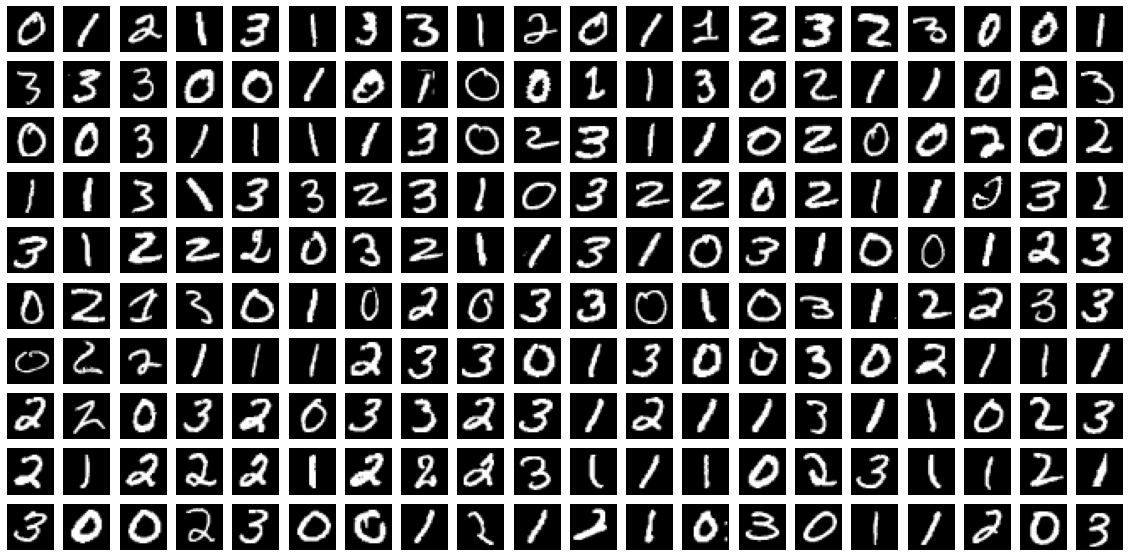

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
for i in range(200):
    plt.subplot(10, 20, i+1)
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.show()